In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import SCORERS
%matplotlib inline

In [2]:

def show_cross_validate(m, X, y, k=5):
    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'max_error', 'r2']
    cv_results = cross_validate(estimator=m, X=X, y=y, cv=k, scoring=scoring)
    
    print('neg_mean_absolute_error: ', cv_results['test_neg_mean_absolute_error'].mean(),
         '\nneg_mean_squared_error: ', cv_results['test_neg_mean_squared_error'].mean(),
         '\nmax_error: ', cv_results['test_max_error'].mean(),
         '\nR2_Score:', cv_results['test_r2'].mean())
    #print(cv_results)


In [3]:
df_train = pd.read_csv('./DataSets/train.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
pd.options.display.max_columns = None

In [5]:
#correlation = df_train.corr()
#f, ax = plt.subplots(figsize=(10, 7))
#sns.heatmap(correlation)
#lt.show()


In [6]:
correlation = df_train.drop(columns={'Id', 'GarageArea'}).corr()
colunas = correlation.sort_values(['SalePrice'], ascending=False).SalePrice

In [7]:
#colunas

In [8]:
colunas = colunas.reset_index()
lista = colunas['index'].to_list()

In [9]:
df = df_train[lista].copy()
#df.drop(columns={'GarageArea'}, inplace=True)
df.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea',
       'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea',
       'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal',
       'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch',
       'KitchenAbvGr'],
      dtype='object')

In [10]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

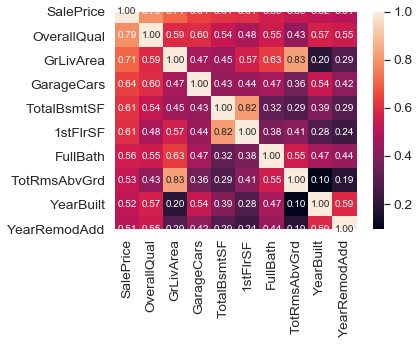

In [11]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [12]:
df = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]
df

,SalePrice,OverallQual,GrLivArea,GarageCars,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,856,2,8,2003
1,181500,6,1262,2,1262,2,6,1976
2,223500,7,1786,2,920,2,6,2001
3,140000,7,1717,3,961,1,7,1915
4,250000,8,2198,3,1145,2,9,2000
...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,953,2,7,1999
1456,210000,6,2073,2,2073,2,7,1978
1457,266500,7,2340,1,1188,2,9,1941
1458,142125,5,1078,1,1078,1,5,1950


In [13]:
#sns.set(context='notebook', style='whitegrid')
#sns.pairplot(df, height=2.5)
#plt.show()

# Coorelation between Material of house and Sale Price

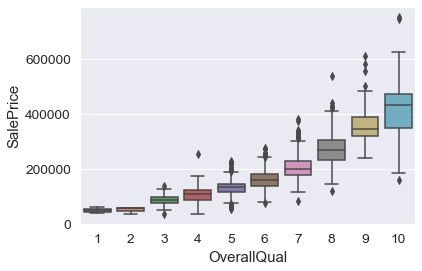

In [14]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df)

# There is a coorelation between SalePrice and YearBuilt

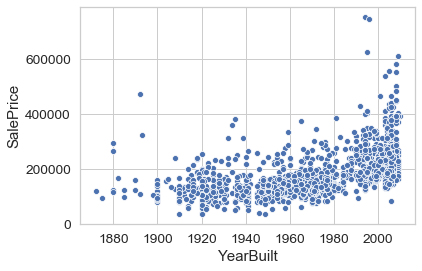

In [15]:
sns.set_style('whitegrid')
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)

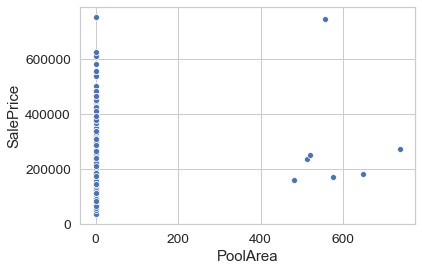

In [16]:
sns.scatterplot(x='PoolArea', y='SalePrice', data=df_train)

Text(0.5, 1.0, 'Relation Between First Floor Size and Sale Price')

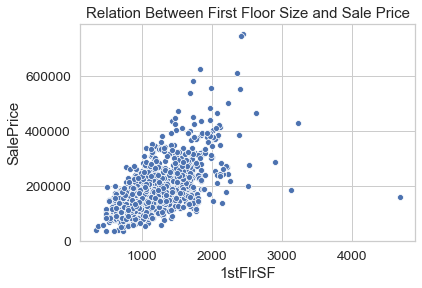

In [17]:
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=df).set_title('Relation Between First Floor Size and Sale Price')

Text(0.5, 1.0, 'Relation Between Number of FullBaths and Price Sale')

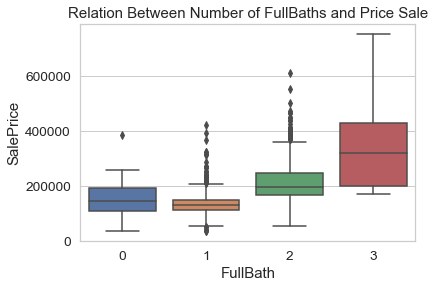

In [18]:
sns.boxplot(x='FullBath', y='SalePrice', data=df).set_title('Relation Between Number of FullBaths and Price Sale')

# Deal with NaN Values

In [19]:
df_train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [20]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Normal Distribution

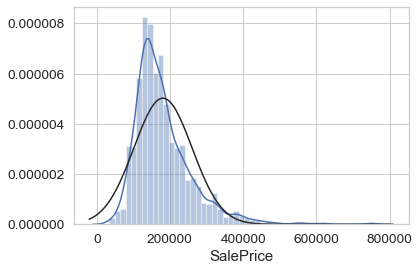

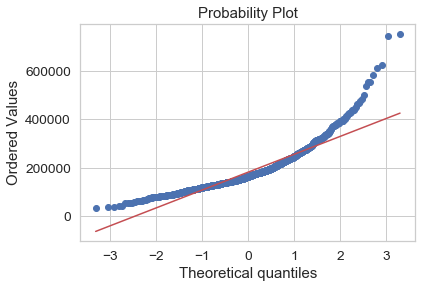

In [21]:
#Histogram and Probability Plot to check if the data distribution is a Normal distribution.
#Histogram: Normal distribution is when your data fit into a bell curve
#Probability Plot: Normal distribution is when your data are in a straight diagonal line into your plot
sns.distplot(df_train.SalePrice, fit=norm)
fig = plt.figure()
res = stats.probplot(df_train.SalePrice, plot=plt)

In [22]:
#SalePrice isn't Normal. However, it's a case of positive skewness, log transformation usually works well.
df_train['SalePrice'] = np.log(df_train['SalePrice'])

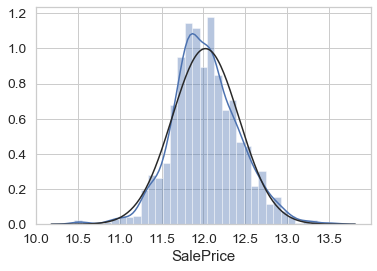

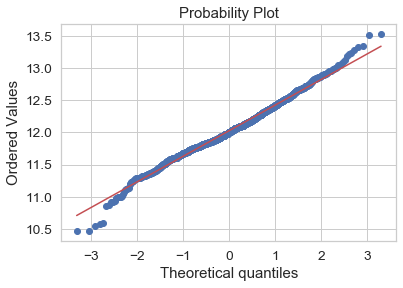

In [23]:
#Now the Sale Price is normalized
sns.distplot(df_train.SalePrice, fit=norm)
fig = plt.figure()
res = stats.probplot(df_train.SalePrice, plot=plt)

In [24]:
df.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

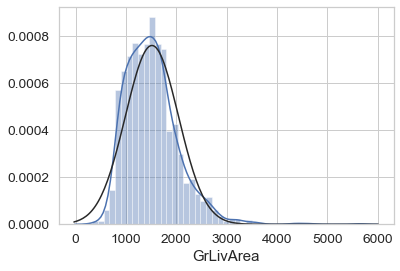

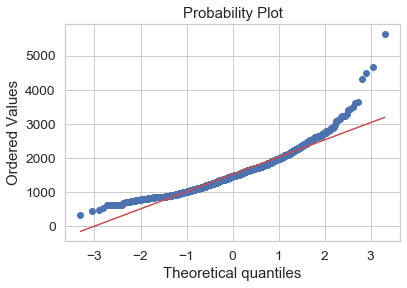

In [25]:
#Histogram and Probability Plot to check if the data distribution is a Normal distribution.
#GrLivArea is also not normalized.
sns.distplot(df_train.GrLivArea, fit=norm)
fig = plt.figure()
res = stats.probplot(df_train.GrLivArea, plot=plt)

In [26]:
#Normalizing GrLivArea
df_train.GrLivArea = np.log(df_train.GrLivArea)

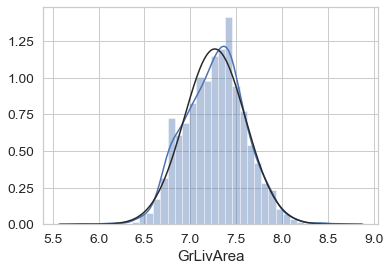

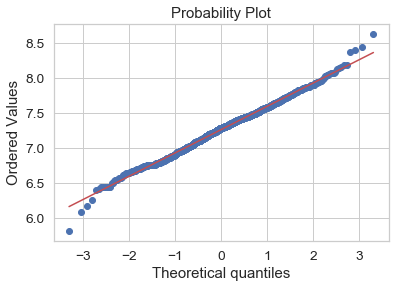

In [27]:
#Normalized Histogram and Probability plot 
sns.distplot(df_train.GrLivArea , fit=norm)
fig = plt.figure()
res = stats.probplot(df_train.GrLivArea, plot=plt)

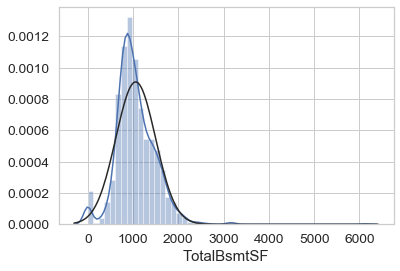

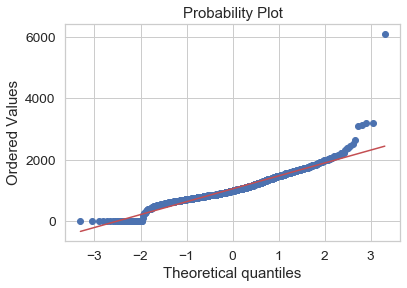

In [28]:
sns.distplot(df_train.TotalBsmtSF, fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [29]:
#pd.options.display.max_rows= 60
#pd.options.display.max_columns = 20

In [30]:
df_train[['SalePrice', 'GrLivArea', 'TotalBsmtSF']]

,SalePrice,GrLivArea,TotalBsmtSF
0,12.247694,7.444249,856
1,12.109011,7.140453,1262
2,12.317167,7.487734,920
3,11.849398,7.448334,756
4,12.429216,7.695303,1145
...,...,...,...
1455,12.072541,7.406711,953
1456,12.254863,7.636752,1542
1457,12.493130,7.757906,1152
1458,11.864462,6.982863,1078


In [31]:
#Createa a new column for say whether there is a Basement or not.
df_train['HasBsmt'] = df_train.apply(lambda x: 1 if x['TotalBsmtSF'] > 0 else 0, axis=1)

In [32]:
df_train[['TotalBsmtSF', 'HasBsmt']].head()

,TotalBsmtSF,HasBsmt
0,856,1
1,1262,1
2,920,1
3,756,1
4,1145,1


In [33]:
#Normalizing the data that is larger then zero with log
df_train.loc[df_train.HasBsmt == 1, 'TotalBsmtSF'] = np.log(df_train[df_train.TotalBsmtSF > 0].TotalBsmtSF)

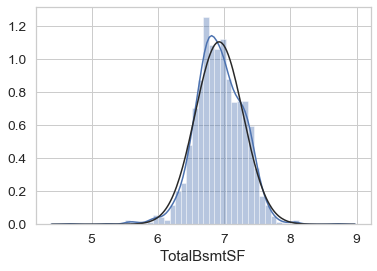

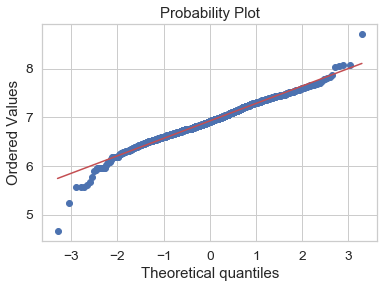

In [34]:
#Histogram and Probability plot after normalized
sns.distplot(df_train[df_train.TotalBsmtSF > 0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train.TotalBsmtSF > 0]['TotalBsmtSF'], plot=plt)

# Starting with Machine Learning

# Linear Regression

In [35]:
df.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [162]:
df_x = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd']]
df_y = df_train.SalePrice

#X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, train_size = 0.7, random_state = 1)

In [180]:
#model = LinearRegression()
#model = DecisionTreeRegressor(min_samples_split=4, max_depth=6, presort=False)
model = RandomForestRegressor(n_estimators=100, max_depth=6)
show_cross_validate(model, df_x, df_y, 5)

neg_mean_absolute_error:  -0.12190494356697926 
neg_mean_squared_error:  -0.030214994767767577 
max_error:  -0.9709600948257773 
R2_Score: 0.8099990303965006


In [164]:
#sorted(SCORERS.keys())

In [165]:
model.fit(df_x, df_y)
yhat = model.predict(df_x)

In [166]:
model.score(df_x, df_y)

0.8798214350569524

In [167]:
yhat = pd.DataFrame(yhat).rename(columns={0:'Predito'})
yhat = yhat.set_index(df_y.index)
yhat['Verdadeiro'] = pd.DataFrame(df_y)
np.exp(yhat)
yhat = pd.DataFrame(yhat).rename(columns={0:'Predito'})
yhat = yhat.set_index(df_y.index)
yhat['Verdadeiro'] = pd.DataFrame(df_y)
np.exp(yhat)

,Predito,Verdadeiro
0,186356.215230,208500.0
1,169086.175247,181500.0
2,197970.859322,223500.0
3,179168.046393,140000.0
4,287832.221121,250000.0
...,...,...
1455,179017.399593,175000.0
1456,210644.775827,210000.0
1457,254195.969375,266500.0
1458,135901.011710,142125.0
